https://blog.csdn.net/fengdu78/article/details/142531250

In [67]:
import onnx
from onnx import helper
from onnx import TensorProto

# 1、定义输入输出向量
# 通过make_tensor_value_info定义向量，参数分别表示：向量名称，向量类型和向量形状。
# 如input向量名称是input，向量类型是TensorProto.FLOAT，向量大小是[1,3,256,256]。

# define tensor
input = helper.make_tensor_value_info('input', TensorProto.FLOAT, [1,3,256, 256])
roi = helper.make_tensor_value_info('roi',TensorProto.FLOAT,[])
scales = helper.make_tensor_value_info('scales',TensorProto.FLOAT,[4])
conv_input = helper.make_tensor_value_info('conv_input',TensorProto.FLOAT,[1,3,512,512])
conv_weight = helper.make_tensor_value_info('conv_weight',TensorProto.FLOAT,[32,3,3,3])
conv_bias = helper.make_tensor_value_info('conv_bias',TensorProto.FLOAT,[32])
conv_output = helper.make_tensor_value_info('conv_output',TensorProto.FLOAT,[1,32,512,512])
add_input = helper.make_tensor_value_info('add_input',TensorProto.FLOAT,[1])
output = helper.make_tensor_value_info('output',TensorProto.FLOAT,[1,32,512,512])

In [68]:
# 2、构建节点
# 通过make_node构建节点，参数分别表示onnx算子，输入名称、输出名称和节点名称。
# 如节点resize_node的onnx算子是Resize，输入名称是input,roi,scales，输出名称是conv_input，节点名称是resize。

resize_node = helper.make_node("Resize",['input','roi','scales'],['conv_input'],name='resize')
conv_node = helper.make_node("Conv",['conv_input','conv_weight','conv_bias'],['conv_output'],name='conv')
add_node = helper.make_node('Add',['conv_output','add_input'],['output'],name='add')

In [69]:
# 3、构建图
# 通过make_graph构建图，参数分别表示onnx节点，图名称，输入向量和输出向量

graph = helper.make_graph([resize_node,conv_node,add_node],'resize_conv_add_graph',inputs=[input,roi,scales,conv_weight,conv_bias,add_input],outputs=[output])

In [70]:
# 构建和检测模型
# 通过make_model构建模型，参数graph表示网络图。
# 通过check_model检测构建的模型是否准确，参数model表示构建的模型。

# 默认opset为22，但是目前onnxruntime最高支持opset 21，为了后面测试onnxruntime，这里指定opset版本为21。
from onnx import OperatorSetIdProto
opset = OperatorSetIdProto()
opset.domain = ''  # 空字符串表示默认的 ONNX 操作域
opset.version = 21  # 设置 opset 版本为 21

model = helper.make_model(graph, opset_imports=[opset], producer_name='example_producer')
onnx.checker.check_model(model)  # 检测模型的准确性

In [71]:
# 保存模型
onnx.save(model, 'resize_conv_add.onnx')

In [72]:
#!netron resize_conv_add.onnx

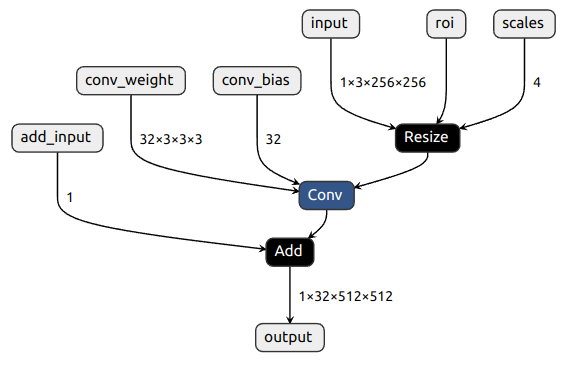